In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('Telco_Customer_Churn.csv')

In [35]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
df.drop('customerID', axis=1, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [38]:
df.columns = [column.lower() for column in df.columns]

In [39]:
df.totalcharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [40]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [41]:
df[df.totalcharges.isnull()]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [42]:
df1 = df[~df.totalcharges.isnull()]
df1.shape

(7032, 20)

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   seniorcitizen     7032 non-null   int64  
 2   partner           7032 non-null   object 
 3   dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   phoneservice      7032 non-null   object 
 6   multiplelines     7032 non-null   object 
 7   internetservice   7032 non-null   object 
 8   onlinesecurity    7032 non-null   object 
 9   onlinebackup      7032 non-null   object 
 10  deviceprotection  7032 non-null   object 
 11  techsupport       7032 non-null   object 
 12  streamingtv       7032 non-null   object 
 13  streamingmovies   7032 non-null   object 
 14  contract          7032 non-null   object 
 15  paperlessbilling  7032 non-null   object 
 16  paymentmethod     7032 non-null   object 


<AxesSubplot:xlabel='tenure', ylabel='Count'>

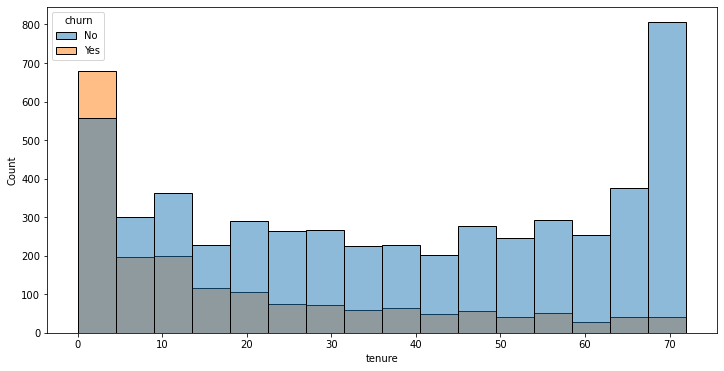

In [44]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tenure', hue='churn')

In [45]:
y_n_columns = []

for column in df1.columns:
    if (df1[column].dtype == 'O') and ('No' in df1[column].unique()):
        y_n_columns.append(column)
        print(f'{column} : {df1[column].unique()}')

partner : ['Yes' 'No']
dependents : ['No' 'Yes']
phoneservice : ['No' 'Yes']
multiplelines : ['No phone service' 'No' 'Yes']
internetservice : ['DSL' 'Fiber optic' 'No']
onlinesecurity : ['No' 'Yes' 'No internet service']
onlinebackup : ['Yes' 'No' 'No internet service']
deviceprotection : ['No' 'Yes' 'No internet service']
techsupport : ['No' 'Yes' 'No internet service']
streamingtv : ['No' 'Yes' 'No internet service']
streamingmovies : ['No' 'Yes' 'No internet service']
paperlessbilling : ['Yes' 'No']
churn : ['No' 'Yes']


In [46]:
for column in y_n_columns:
    df1[column] = df1[column].apply(lambda x: 0 if 'No' in x else 1)

<ipython-input-46-715c893982de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = df1[column].apply(lambda x: 0 if 'No' in x else 1)


In [47]:
df1.gender = df1.gender.apply(lambda x: 1 if x == 'Female' else 0)

C:\Users\Santiago\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [48]:
cat_columns = []

for column in df1.columns:
    if df1[column].dtype == 'O':
        cat_columns.append(column)
        print(f'{column} : {df1[column].unique()}')

contract : ['Month-to-month' 'One year' 'Two year']
paymentmethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [49]:
df1 = pd.get_dummies(df1, columns=cat_columns, drop_first=True)

In [50]:
df1.columns = [column.lower() for column in df1.columns]
df1.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,streamingmovies,paperlessbilling,monthlycharges,totalcharges,churn,contract_one year,contract_two year,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check
0,1,0,1,0,1,0,0,1,0,1,...,0,1,29.85,29.85,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,1,0,...,0,0,56.95,1889.50,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,1,...,0,1,53.85,108.15,1,0,0,0,0,1
3,0,0,0,0,45,0,0,1,1,0,...,0,0,42.30,1840.75,0,1,0,0,0,0
4,1,0,0,0,2,1,0,1,0,0,...,0,1,70.70,151.65,1,0,0,0,1,0


In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
columns = ['tenure', 'monthlycharges', 'totalcharges']

In [53]:
scaler = MinMaxScaler()

df1[columns] = scaler.fit_transform(df1[columns])

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = df1.drop('churn', axis=1)
y = df1['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
import tensorflow as tf
from tensorflow import keras

In [57]:
X_train.shape

(4922, 22)

In [58]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(22, activation='relu'))
model.add(keras.layers.Dense(15, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/200
154/154 [==============================] - 1s 2ms/step - loss: 0.5707 - accuracy: 0.6898 - val_loss: 0.4882 - val_accuracy: 0.7611
Epoch 2/200
154/154 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.7771 - val_loss: 0.4404 - val_accuracy: 0.7872
Epoch 3/200
154/154 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.7918 - val_loss: 0.4326 - val_accuracy: 0.7948
Epoch 4/200
154/154 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.7987 - val_loss: 0.4390 - val_accuracy: 0.7848
Epoch 5/200
154/154 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.7983 - val_loss: 0.4314 - val_accuracy: 0.7905
Epoch 6/200
154/154 [==============================] - 0s 1ms/step - loss: 0.4197 - accuracy: 0.8003 - val_loss: 0.4284 - val_accuracy: 0.7972
Epoch 7/200
154/154 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8021 - val_loss: 0.4285 - val_accuracy: 0.7976

Epoch 58/200
154/154 [==============================] - 0s 1ms/step - loss: 0.3749 - accuracy: 0.8265 - val_loss: 0.4417 - val_accuracy: 0.7872
Epoch 59/200
154/154 [==============================] - 0s 1ms/step - loss: 0.3741 - accuracy: 0.8239 - val_loss: 0.4425 - val_accuracy: 0.7919
Epoch 60/200
154/154 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.8241 - val_loss: 0.4452 - val_accuracy: 0.7825
Epoch 61/200
154/154 [==============================] - 0s 1ms/step - loss: 0.3743 - accuracy: 0.8281 - val_loss: 0.4455 - val_accuracy: 0.7910
Epoch 62/200
154/154 [==============================] - 0s 1ms/step - loss: 0.3725 - accuracy: 0.8253 - val_loss: 0.4435 - val_accuracy: 0.7891
Epoch 63/200
154/154 [==============================] - 0s 2ms/step - loss: 0.3713 - accuracy: 0.8273 - val_loss: 0.4444 - val_accuracy: 0.7919
Epoch 64/200
154/154 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8285 - val_loss: 0.4466 - val_accuracy:

Epoch 115/200
154/154 [==============================] - 0s 2ms/step - loss: 0.3494 - accuracy: 0.8377 - val_loss: 0.4667 - val_accuracy: 0.7834
Epoch 116/200
154/154 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8367 - val_loss: 0.4678 - val_accuracy: 0.7848
Epoch 117/200
154/154 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8346 - val_loss: 0.4670 - val_accuracy: 0.7834
Epoch 118/200
154/154 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8358 - val_loss: 0.4692 - val_accuracy: 0.7829
Epoch 119/200
154/154 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8360 - val_loss: 0.4776 - val_accuracy: 0.7711
Epoch 120/200
154/154 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.8375 - val_loss: 0.4679 - val_accuracy: 0.7763
Epoch 121/200
154/154 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8360 - val_loss: 0.4676 - val_ac

154/154 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8440 - val_loss: 0.4929 - val_accuracy: 0.7768
Epoch 172/200
154/154 [==============================] - 0s 1ms/step - loss: 0.3330 - accuracy: 0.8444 - val_loss: 0.4900 - val_accuracy: 0.7754
Epoch 173/200
154/154 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8444 - val_loss: 0.4959 - val_accuracy: 0.7739
Epoch 174/200
154/154 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8434 - val_loss: 0.4922 - val_accuracy: 0.7725
Epoch 175/200
154/154 [==============================] - 0s 1ms/step - loss: 0.3299 - accuracy: 0.8434 - val_loss: 0.4968 - val_accuracy: 0.7678
Epoch 176/200
154/154 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8440 - val_loss: 0.4979 - val_accuracy: 0.7720
Epoch 177/200
154/154 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8462 - val_loss: 0.4955 - val_accuracy: 0.7697

<AxesSubplot:>

<Figure size 864x432 with 0 Axes>

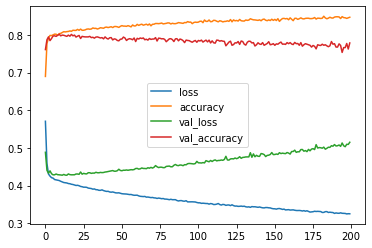

In [60]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(12, 6))
losses.plot()

In [61]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [62]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(22, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(15, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
model.fit(X_train, y_train, epochs=200, batch_size=32, 
          validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/200
154/154 [==============================] - 1s 2ms/step - loss: 0.6079 - accuracy: 0.7145 - val_loss: 0.5350 - val_accuracy: 0.7341
Epoch 2/200
154/154 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.7367 - val_loss: 0.4902 - val_accuracy: 0.7550
Epoch 3/200
154/154 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.7469 - val_loss: 0.4584 - val_accuracy: 0.7787
Epoch 4/200
154/154 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.7564 - val_loss: 0.4508 - val_accuracy: 0.7858
Epoch 5/200
154/154 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7564 - val_loss: 0.4435 - val_accuracy: 0.7853
Epoch 6/200
154/154 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7580 - val_loss: 0.4410 - val_accuracy: 0.7853
Epoch 7/200
154/154 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7645 - val_loss: 0.4382 - val_accuracy: 0.7934

<AxesSubplot:>

<Figure size 864x432 with 0 Axes>

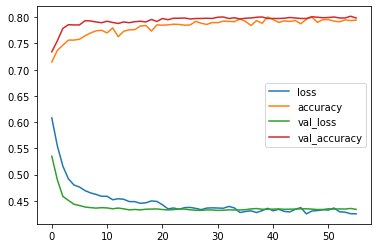

In [64]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(12, 6))
losses.plot()

In [72]:
predictions = model.predict(X_test)
y_pred = []

for prediction in predictions:
    if prediction < 0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)
        
y_pred

66/66 [==============================] - 0s 720us/step


[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [73]:
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1549
           1       0.63      0.57      0.60       561

    accuracy                           0.80      2110
   macro avg       0.74      0.73      0.73      2110
weighted avg       0.79      0.80      0.80      2110



In [78]:
model.fit(X_train, y_train, epochs=100, 
          validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.7997 - val_loss: 0.4327 - val_accuracy: 0.8009
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.7928 - val_loss: 0.4341 - val_accuracy: 0.7953
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.7950 - val_loss: 0.4345 - val_accuracy: 0.7957
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4254 - accuracy: 0.7983 - val_loss: 0.4322 - val_accuracy: 0.7976
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.7968 - val_loss: 0.4320 - val_accuracy: 0.7967
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.7974 - val_loss: 0.4331 - val_accuracy: 0.7995
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.7936 - val_loss: 0.4322 - val_accuracy: 0.7976

<AxesSubplot:>

<Figure size 864x432 with 0 Axes>

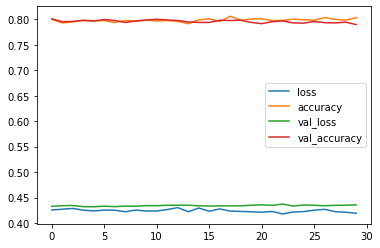

In [79]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(12, 6))
losses.plot()